In [1]:
from __future__ import division
import sklearn.metrics as m
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np
import cPickle as pickle

In [2]:
def compare_curves(f_old, f_new):
    old_x, old_y = list(), list()
    for line in open(f_old).readlines():
        old_x.append(line.strip().split('\t')[1])
        old_y.append(line.strip().split('\t')[0])
    old_x, old_y = np.array(old_x[:2000]), np.array(old_y[:2000])
    old_x, old_y = old_x.astype('float64'), old_y.astype('float64')
    
    new_x, new_y = list(), list()
    for line in open(f_new).readlines():
        new_x.append(line.strip().split('\t')[1])
        new_y.append(line.strip().split('\t')[0])
    new_x, new_y = np.array(new_x[:2000]), np.array(new_y[:2000])
    new_x, new_y = new_x.astype('float64'), new_y.astype('float64')
    
    x_end = min(old_x[-1], new_x[-1])
    old_length = np.argmin(np.absolute(old_x - x_end))
    new_length = np.argmin(np.absolute(new_x - x_end))
    print old_length, new_length
    
    old_x, old_y = old_x[:old_length], old_y[:old_length]
    new_x, new_y = new_x[:new_length], new_y[:new_length]

    print m.auc(old_x, old_y)
    print m.auc(new_x, new_y)
    plt.figure(1)
    plt.plot(old_x, old_y, label='OLD')
    plt.plot(new_x, new_y, label='NEW')
    plt.title("Performance comparison of RL-DS on Riedel dataset")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.xlim(0.0, 0.5)
    plt.ylim(0.3, 1.0)
    plt.legend(loc=0, ncol=2)
    leg = plt.gca().get_legend()
    ltext  = leg.get_texts()
    plt.setp(ltext, fontsize='small')
    plt.show()

1999 1882
0.18329418515
0.205149018369


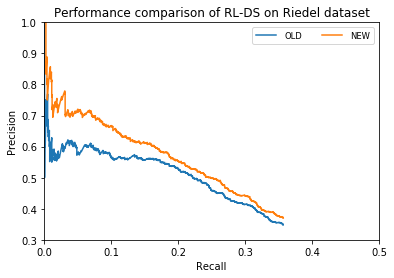

In [23]:
f_old = './origin_data/curve_522611/CNN+ONE.txt'
f_new = './NRE-master/CNN+ONE/out/pr14.txt'
compare_curves(f_old, f_new)

1993 1850
0.204716506059
0.218262169328


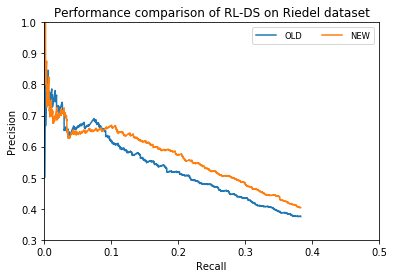

In [22]:
f_old = './origin_data/curve_522611/CNN+ATT.txt'
f_new = './NRE-master/CNN+ATT/out/pr14.txt'
compare_curves(f_old, f_new)

1992 1901
0.211826957539
0.223694298843


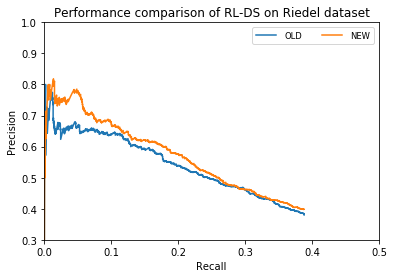

In [20]:
f_old = './origin_data/curve_522611/PCNN+ONE.txt'
f_new = './NRE-master/PCNN+ONE/out/pr14.txt'
compare_curves(f_old, f_new)

1995 1822
0.218398980561
0.225730296901


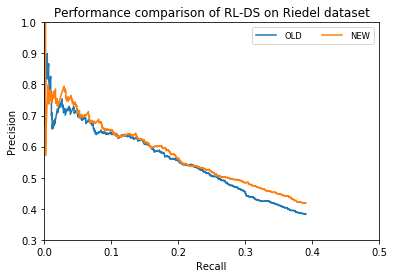

In [21]:
f_old = './origin_data/curve_522611/PCNN+ATT.txt'
f_new = './NRE-master/PCNN+ATT/out/pr14.txt'
compare_curves(f_old, f_new)